In [45]:
import numpy as np
import pandas as pd
import imageio.v3 as io
import cv2
from tqdm import tqdm
from typing import Optional, Union

import matplotlib.pyplot as plt
import seaborn as sns

## Descarga dataset : datos e imágenes


In [46]:
#Descarga del dataset
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2024-03-02 05:28:54--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [             <=>    ]  52.85M  21.0MB/s    in 2.5s    

2024-03-02 05:28:57 (21.0 MB/s) - ‘airbnb-listings.csv’ saved [55414009]



#### Exploración Inicial
Mostrar las primeras filas del dataframe nos permite obtener una vista preliminar de los datos, incluyendo las columnas disponibles y el tipo de información que contienen. Esta es una práctica común para familiarizarse con el conjunto de datos antes de proceder a un análisis más detallado.


In [47]:
#Guardado csv en pandas dataframe
data = pd.read_csv("airbnb-listings.csv", sep = ';')

#Quitamos aquellas columnas donde el precio sea nulo
data = data.dropna(subset=['Price'])
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,16536728,https://www.airbnb.com/rooms/16536728,20170407214119,2017-04-08,Ático en el Barrio de Salamanca,Precioso ático en el barrio de Salamanca. Dos...,NaN,Precioso ático en el barrio de Salamanca. Dos...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,1,NaN,"40.43007580267911,-3.674373225929859","Host Has Profile Pic,Is Location Exact,Require..."
1,14800288,https://www.airbnb.com/rooms/14800288,20170407214119,2017-04-08,"Salamanca Comfort XI, Friendly Rentals","Lugares de interés: Fide, Bienmesabe, Restaura...",Apartamento de nueva construcción (julio 2016)...,Apartamento de nueva construcción (julio 2016)...,none,"Localizado en el distrito de Salamanca, uno de...",...,8.0,10.0,9.0,NaN,NaN,strict,145,0.79,"40.43561324649597,-3.678321445006713","Host Has Profile Pic,Is Location Exact,Require..."
2,12357427,https://www.airbnb.com/rooms/12357427,20170407214119,2017-04-08,Apt. by the music Conservatory!!,Very bright apartment with 2 bedrooms 1 with p...,NaN,Very bright apartment with 2 bedrooms 1 with p...,none,NaN,...,8.0,8.0,8.0,NaN,NaN,flexible,1,0.43,"40.446440723481764,-3.6742595345116214","Host Has Profile Pic,Host Identity Verified,Is..."
3,7984552,https://www.airbnb.com/rooms/7984552,20170407214119,2017-04-08,Double Room near RealMadrid Stadium,The flat is on the ground floor. There's a com...,Cosy large room for two people with a flat TV ...,The flat is on the ground floor. There's a com...,none,Chamartín is an administrative district of Mad...,...,NaN,NaN,NaN,NaN,NaN,moderate,2,NaN,"40.455167347211834,-3.698099022915008","Host Is Superhost,Host Has Profile Pic,Is Loca..."
4,17244421,https://www.airbnb.com/rooms/17244421,20170407214119,2017-04-08,Mid Century Flat,Mi alojamiento es bueno para viajeros de negoc...,NaN,Mi alojamiento es bueno para viajeros de negoc...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.43988285945364,-3.71737227282086","Host Has Profile Pic,Is Location Exact,Require..."


## Preprocesamiento de la Data

In [48]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [49]:
data.City.value_counts()

Madrid                 13198
Barcelona                292
马德里                       52
Palma                     49
Alcúdia                   40
                       ...  
Aravaca (Madrid)           1
Sa Coma                    1
Comunidad de Madrid        1
Son Vida                   1
Son Moll                   1
Name: City, Length: 135, dtype: int64

#### Hay un claro desequilibrio en los datos

In [50]:
# Filtrar las entradas que contienen "mad" en el campo City, insensible a mayúsculas
df_madrid = data[data['City'].str.contains('mad', case=False, na=False)]

df_madrid.head()


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,16536728,https://www.airbnb.com/rooms/16536728,20170407214119,2017-04-08,Ático en el Barrio de Salamanca,Precioso ático en el barrio de Salamanca. Dos...,NaN,Precioso ático en el barrio de Salamanca. Dos...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,1,NaN,"40.43007580267911,-3.674373225929859","Host Has Profile Pic,Is Location Exact,Require..."
1,14800288,https://www.airbnb.com/rooms/14800288,20170407214119,2017-04-08,"Salamanca Comfort XI, Friendly Rentals","Lugares de interés: Fide, Bienmesabe, Restaura...",Apartamento de nueva construcción (julio 2016)...,Apartamento de nueva construcción (julio 2016)...,none,"Localizado en el distrito de Salamanca, uno de...",...,8.0,10.0,9.0,NaN,NaN,strict,145,0.79,"40.43561324649597,-3.678321445006713","Host Has Profile Pic,Is Location Exact,Require..."
2,12357427,https://www.airbnb.com/rooms/12357427,20170407214119,2017-04-08,Apt. by the music Conservatory!!,Very bright apartment with 2 bedrooms 1 with p...,NaN,Very bright apartment with 2 bedrooms 1 with p...,none,NaN,...,8.0,8.0,8.0,NaN,NaN,flexible,1,0.43,"40.446440723481764,-3.6742595345116214","Host Has Profile Pic,Host Identity Verified,Is..."
3,7984552,https://www.airbnb.com/rooms/7984552,20170407214119,2017-04-08,Double Room near RealMadrid Stadium,The flat is on the ground floor. There's a com...,Cosy large room for two people with a flat TV ...,The flat is on the ground floor. There's a com...,none,Chamartín is an administrative district of Mad...,...,NaN,NaN,NaN,NaN,NaN,moderate,2,NaN,"40.455167347211834,-3.698099022915008","Host Is Superhost,Host Has Profile Pic,Is Loca..."
4,17244421,https://www.airbnb.com/rooms/17244421,20170407214119,2017-04-08,Mid Century Flat,Mi alojamiento es bueno para viajeros de negoc...,NaN,Mi alojamiento es bueno para viajeros de negoc...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.43988285945364,-3.71737227282086","Host Has Profile Pic,Is Location Exact,Require..."


In [51]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13238 entries, 0 to 14000
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              13238 non-null  int64  
 1   Listing Url                     13238 non-null  object 
 2   Scrape ID                       13238 non-null  int64  
 3   Last Scraped                    13238 non-null  object 
 4   Name                            13238 non-null  object 
 5   Summary                         12753 non-null  object 
 6   Space                           9666 non-null   object 
 7   Description                     13232 non-null  object 
 8   Experiences Offered             13238 non-null  object 
 9   Neighborhood Overview           8290 non-null   object 
 10  Notes                           5021 non-null   object 
 11  Transit                         8242 non-null   object 
 12  Access                          

Selección de Características:
En el desarrollo de modelos predictivos, uno de los pasos más cruciales antes del entrenamiento es la selección de características (también conocida como selección de variables o selección de atributos). Este proceso implica identificar y seleccionar aquellos datos de entrada que son más relevantes para predecir la variable objetivo.

In [52]:
df_madrid = df_madrid[["Property Type", "Room Type", "Cancellation Policy", "Accommodates", "Bathrooms", "Bedrooms", "Beds", "Guests Included", "Extra People", "Amenities", "Minimum Nights"
                 ,"Maximum Nights", "Number of Reviews", "Host Total Listings Count", "Price"]]

In [53]:
df_madrid.head()

,Property Type,Room Type,Cancellation Policy,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Amenities,Minimum Nights,Maximum Nights,Number of Reviews,Host Total Listings Count,Price
0,Apartment,Entire home/apt,moderate,4,1.0,2.0,2.0,1,0,"TV,Wireless Internet,Air conditioning,Kitchen,...",3,1125,0,1.0,120.0
1,Apartment,Entire home/apt,strict,7,2.0,2.0,5.0,1,5,"TV,Internet,Wireless Internet,Air conditioning...",2,1125,5,164.0,70.0
2,Apartment,Entire home/apt,flexible,3,1.0,2.0,2.0,1,0,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",2,1125,5,2.0,110.0
3,Apartment,Private room,moderate,2,1.0,1.0,2.0,1,30,"TV,Cable TV,Internet,Wireless Internet,Wheelch...",1,1125,0,2.0,30.0
4,Apartment,Entire home/apt,flexible,1,1.0,1.0,1.0,1,0,"TV,Wireless Internet,Kitchen,Elevator in build...",1,1125,0,1.0,60.0


In [54]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13238 entries, 0 to 14000
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property Type              13238 non-null  object 
 1   Room Type                  13238 non-null  object 
 2   Cancellation Policy        13238 non-null  object 
 3   Accommodates               13238 non-null  int64  
 4   Bathrooms                  13190 non-null  float64
 5   Bedrooms                   13215 non-null  float64
 6   Beds                       13190 non-null  float64
 7   Guests Included            13238 non-null  int64  
 8   Extra People               13238 non-null  int64  
 9   Amenities                  13131 non-null  object 
 10  Minimum Nights             13238 non-null  int64  
 11  Maximum Nights             13238 non-null  int64  
 12  Number of Reviews          13238 non-null  int64  
 13  Host Total Listings Count  13235 non-null  flo

In [55]:
# Eliminar filas donde haya al menos un NA en cualquier columna del DataFrame df_madrid
df_madrid = df_madrid.dropna()


In [56]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13067 entries, 0 to 14000
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property Type              13067 non-null  object 
 1   Room Type                  13067 non-null  object 
 2   Cancellation Policy        13067 non-null  object 
 3   Accommodates               13067 non-null  int64  
 4   Bathrooms                  13067 non-null  float64
 5   Bedrooms                   13067 non-null  float64
 6   Beds                       13067 non-null  float64
 7   Guests Included            13067 non-null  int64  
 8   Extra People               13067 non-null  int64  
 9   Amenities                  13067 non-null  object 
 10  Minimum Nights             13067 non-null  int64  
 11  Maximum Nights             13067 non-null  int64  
 12  Number of Reviews          13067 non-null  int64  
 13  Host Total Listings Count  13067 non-null  flo

### Transformamos las amenidades en numeros asi calcular de mejor manera de que manera influye el nuemro de las amenidades en el precio de los inmuebles.

In [57]:
df_madrid["Amenities"] = df_madrid["Amenities"].str.split(',').apply(len)


df_madrid.head()

,Property Type,Room Type,Cancellation Policy,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Amenities,Minimum Nights,Maximum Nights,Number of Reviews,Host Total Listings Count,Price
0,Apartment,Entire home/apt,moderate,4,1.0,2.0,2.0,1,0,15,3,1125,0,1.0,120.0
1,Apartment,Entire home/apt,strict,7,2.0,2.0,5.0,1,5,15,2,1125,5,164.0,70.0
2,Apartment,Entire home/apt,flexible,3,1.0,2.0,2.0,1,0,17,2,1125,5,2.0,110.0
3,Apartment,Private room,moderate,2,1.0,1.0,2.0,1,30,17,1,1125,0,2.0,30.0
4,Apartment,Entire home/apt,flexible,1,1.0,1.0,1.0,1,0,10,1,1125,0,1.0,60.0


### Analisamos variables categoricas y numericas

In [58]:
# Análisis de variables categóricas: Frecuencias y porcentajes
for columna in ['Property Type', 'Room Type', 'Cancellation Policy']:
    print(df_madrid[columna].value_counts(normalize=True) * 100)  # Porcentajes
    print("\n")

# Estadísticas descriptivas de variables numéricas
print(df_madrid.describe())

Apartment             82.582077
House                  7.201347
Condominium            2.632586
Bed & Breakfast        2.533099
Loft                   2.158108
Other                  1.668325
Dorm                   0.306115
Guesthouse             0.298462
Chalet                 0.168363
Hostel                 0.114793
Serviced apartment     0.099487
Townhouse              0.061223
Boutique hotel         0.038264
Villa                  0.030611
Guest suite            0.022959
Casa particular        0.022959
Earth House            0.022959
Camper/RV              0.015306
Bungalow               0.007653
Tent                   0.007653
Timeshare              0.007653
Name: Property Type, dtype: float64


Entire home/apt    60.143874
Private room       38.463305
Shared room         1.392822
Name: Room Type, dtype: float64


strict             37.996480
flexible           31.736435
moderate           30.213515
super_strict_60     0.038264
super_strict_30     0.015306
Name: Cancellation Polic

##### Este resumen estadístico proporciona una base sólida para entender las características y preferencias en el mercado de alojamiento, destacando la predominancia de apartamentos y la preferencia por alquilar propiedades enteras. La variabilidad en las características numéricas también subraya la diversidad de opciones disponibles para los huéspedes.
##### El valor máximo de Extra People es de 276, es notablemente alto comparado con el tercer cuartil (75%) de 15, indicando la presencia de outliers en esta variable.

#### Del mismo modo Maximum Nights el valor máximo de 1,000,000 noches es extraordinariamente alto y muy probablemente un outlier, ya que el 75% de los listados permiten un máximo de 1125 noches.



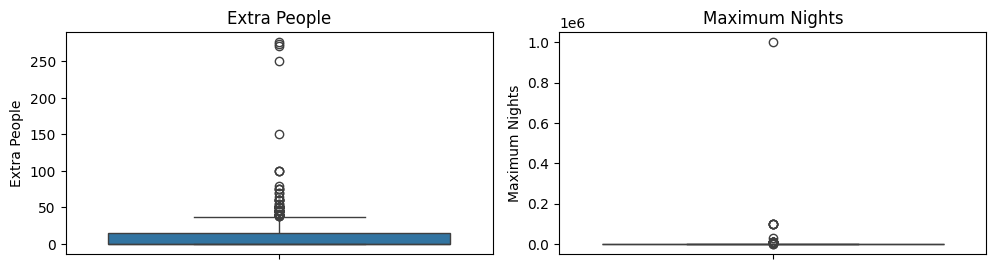

In [59]:
# Visualización de variables numéricas: Boxplots
import matplotlib.pyplot as plt
import seaborn as sns

variables_numericas = [ "Extra People","Maximum Nights", ]

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_numericas, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_madrid, y=var)
    plt.title(var)
plt.tight_layout()
plt.show()

In [60]:
top20_Extra_People = df_madrid['Extra People'].nlargest(20)
print("Top 20 valores más altos para 'Extra People':")
print(top20_Extra_People)

Top 20 valores más altos para 'Extra People':
4617     276
6851     274
10888    271
11172    250
5963     150
6725     100
8054     100
8327     100
5146      80
109       75
1372      75
8357      75
1669      70
13041     70
7208      65
2821      60
3603      60
6332      60
13258     60
13982     60
Name: Extra People, dtype: int64


Los tres más altos (271, 274, 276), son significativamente mayores que los demás y se pueden considerar outliers pero tambien estos podrían ser casos especiales donde el alojamiento tiene políticas únicas para huéspedes adicionales.

Los dejaremos.

In [61]:
top20_maximum_nights = df_madrid['Maximum Nights'].nlargest(40)
print("Top 20 valores más altos para 'Maximum Nights':")
print(top20_maximum_nights)

Top 20 valores más altos para 'Maximum Nights':
1723     1000000
5901      100000
3946       99999
4207       99999
5932       99999
7864       99999
929        30000
8549       11111
11776      11111
2445       10000
3910       10000
3967       10000
4357       10000
6757       10000
12369      10000
3713        9999
3766        9999
3952        9999
10895       9999
5316        5555
8876        5000
1001        2555
11905       2500
311         2000
2701        2000
3046        2000
6139        2000
7062        2000
11089       2000
12209       2000
13736       2000
7572        1999
2758        1900
2558        1825
3371        1825
3481        1825
7855        1825
8080        1825
8271        1825
10566       1825
Name: Maximum Nights, dtype: int64


La presencia de estos valores atípicos extremos puede distorsionar análisis estadísticos y modelos predictivos, por lo que concideraremos considerar establecer un umbral máximo de 1825 (5años)

In [62]:
# Contando el número de listados con "Maximum Nights" mayores a 1825 días
count_over_1825 = df_madrid[df_madrid["Maximum Nights"] > 1825].shape[0]

print(f"Número de listados con 'Maximum Nights' mayores a 1825 días: {count_over_1825}")


Número de listados con 'Maximum Nights' mayores a 1825 días: 33


In [63]:
# Estableciendo un tope máximo de 5000 días para "Maximum Nights"
df_madrid['Maximum Nights'] = df_madrid['Maximum Nights'].apply(lambda x: min(x, 1825))

# Verificando el cambio
df_madrid['Maximum Nights'].describe()

count    13067.000000
mean       835.199663
std        472.975290
min          1.000000
25%        365.000000
50%       1125.000000
75%       1125.000000
max       1825.000000
Name: Maximum Nights, dtype: float64

In [64]:
# Contando el número de listados con "Maximum Nights" mayores a 1125 días
count_over_1125 = df_madrid[df_madrid["Maximum Nights"] > 1125].shape[0]

print(f"Número de listados con 'Maximum Nights' mayores a 1125 días: {count_over_1125}")


Número de listados con 'Maximum Nights' mayores a 1125 días: 67


Al analizar los datos de "Maximum Nights", descubrimos que solo 33 listados exceden el umbral de 1825 días. La decisión de ajustar estos valores a 1825, en lugar de eliminarlos, se basa en varios factores clave. En primer lugar, queremos preservar la mayor cantidad de datos posible. Eliminar registros completos por tener valores extremos en una sola columna puede reducir significativamente el tamaño y la representatividad de nuestro conjunto de datos, limitando la robustez de cualquier análisis posterior.

Además, establecer un límite de 1825 días ayuda a mantener la integridad de nuestro análisis. Los valores extremadamente altos pueden distorsionar los resultados, especialmente las medidas de tendencia central como la media y la mediana. Al ajustar estos valores, minimizamos su impacto sin perder información valiosa sobre otros atributos de esos listados.

Este límite también refleja una duración de estancia más realista y práctica para alquileres de propiedades. Es poco probable que las estancias superen los cinco años, por lo que este ajuste nos permite mantener un enfoque realista y aplicable a nuestro análisis.

Por último, dado que el número de listados afectados es relativamente pequeño, este ajuste tiene un impacto mínimo en el conjunto total de datos. Esto nos permite mejorar la calidad y coherencia de nuestros datos sin alterar significativamente el perfil general de nuestro análisis.


### Preparación Esencial de Características Categóricas Antes de la División de Datos
Antes de proceder con la división de un conjunto de datos en secciones de entrenamiento y prueba, resulta crucial abordar de manera adecuada las características categóricas presentes. Estas características, que representan categorías o tipos (como estados civiles, tipos de vivienda, categorías de productos, etc.), suelen encontrarse en formatos que los algoritmos de aprendizaje automático no pueden procesar directamente debido a su naturaleza no numérica.

In [65]:


# Selecciona las características y la variable objetivo
X = df_madrid.drop('Price', axis=1)  # Características
y = df_madrid['Price']  # Variable objetivo

# Define las columnas categóricas
categorical_cols = ['Property Type', 'Room Type', 'Cancellation Policy']

# Muestra los valores únicos en cada columna categórica
for col in categorical_cols:
    print(f"Valores únicos en '{col}': {X[col].unique()}")

X_encoded = pd.get_dummies(X, columns=categorical_cols)



Valores únicos en 'Property Type': ['Apartment' 'Bed & Breakfast' 'Condominium' 'House' 'Other' 'Loft'
 'Bungalow' 'Guesthouse' 'Chalet' 'Dorm' 'Hostel' 'Serviced apartment'
 'Townhouse' 'Tent' 'Villa' 'Boutique hotel' 'Guest suite'
 'Casa particular' 'Camper/RV' 'Earth House' 'Timeshare']
Valores únicos en 'Room Type': ['Entire home/apt' 'Private room' 'Shared room']
Valores únicos en 'Cancellation Policy': ['moderate' 'strict' 'flexible' 'super_strict_60' 'super_strict_30']


In [66]:
from sklearn.preprocessing import LabelEncoder

# Define las columnas categóricas
categorical_cols = ['Property Type', 'Room Type', 'Cancellation Policy']

# Inicializa el codificador
label_encoder = LabelEncoder()

# Itera sobre las columnas categóricas y aplica el Label Encoding
for col in categorical_cols:
    df_madrid[col] = label_encoder.fit_transform(df_madrid[col])

# Ahora las variables categóricas han sido codificadas


In [67]:
df_madrid["Property Type"].head()

0    0
1    0
2    0
3    0
4    0
Name: Property Type, dtype: int64

In [68]:
df_madrid["Cancellation Policy"].head()

0    1
1    2
2    0
3    1
4    0
Name: Cancellation Policy, dtype: int64

In [69]:
df_madrid["Room Type"].tail()

13996    0
13997    0
13998    0
13999    1
14000    0
Name: Room Type, dtype: int64

In [70]:
df_madrid.describe()

,Property Type,Room Type,Cancellation Policy,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Amenities,Minimum Nights,Maximum Nights,Number of Reviews,Host Total Listings Count,Price
count,13067.000000,13067.000000,13067.000000,13067.000000,13067.000000,13067.000000,13067.000000,13067.000000,13067.000000,13067.000000,13067.000000,13067.000000,13067.000000,13067.000000,13067.000000
mean,1.822836,0.412489,1.064054,3.198898,1.251932,1.295401,1.987908,1.580087,7.417923,14.434147,2.997628,835.199663,23.237698,9.867988,65.844800
std,4.430345,0.519826,0.835066,1.990911,0.593838,0.828181,1.510717,1.086879,10.364521,4.588985,12.553839,472.975290,38.359256,27.678283,55.654178
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,9.000000
25%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,365.000000,1.000000,1.000000,31.000000
50%,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,14.000000,2.000000,1125.000000,8.000000,2.000000,52.000000
75%,0.000000,1.000000,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,15.000000,17.000000,3.000000,1125.000000,28.000000,5.000000,80.000000
max,20.000000,2.000000,4.000000,16.000000,8.000000,10.000000,16.000000,16.000000,276.000000,34.000000,1125.000000,1825.000000,446.000000,265.000000,875.000000


Ahora convertimos todos los datos a un mismo tipo

In [71]:
df_madrid = df_madrid.reset_index()
df_madrid

,index,Property Type,Room Type,Cancellation Policy,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Amenities,Minimum Nights,Maximum Nights,Number of Reviews,Host Total Listings Count,Price
0,0,0,0,1,4,1.0,2.0,2.0,1,0,15,3,1125,0,1.0,120.0
1,1,0,0,2,7,2.0,2.0,5.0,1,5,15,2,1125,5,164.0,70.0
2,2,0,0,0,3,1.0,2.0,2.0,1,0,17,2,1125,5,2.0,110.0
3,3,0,1,1,2,1.0,1.0,2.0,1,30,17,1,1125,0,2.0,30.0
4,4,0,0,0,1,1.0,1.0,1.0,1,0,10,1,1125,0,1.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13062,13996,0,0,1,3,1.0,1.0,2.0,1,25,14,3,60,1,1.0,85.0
13063,13997,0,0,1,3,1.0,1.0,1.0,2,12,14,1,1125,16,5.0,65.0
13064,13998,0,0,1,2,1.0,0.0,1.0,1,0,13,4,1125,6,9.0,69.0
13065,13999,13,1,2,4,2.5,1.0,1.0,1,23,12,90,330,0,3.0,21.0


In [72]:
df_madrid[df_madrid.columns.difference(["Thumbnail Url"])] = df_madrid[df_madrid.columns.difference(["Thumbnail Url"])].astype("float64")
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13067 entries, 0 to 13066
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      13067 non-null  float64
 1   Property Type              13067 non-null  float64
 2   Room Type                  13067 non-null  float64
 3   Cancellation Policy        13067 non-null  float64
 4   Accommodates               13067 non-null  float64
 5   Bathrooms                  13067 non-null  float64
 6   Bedrooms                   13067 non-null  float64
 7   Beds                       13067 non-null  float64
 8   Guests Included            13067 non-null  float64
 9   Extra People               13067 non-null  float64
 10  Amenities                  13067 non-null  float64
 11  Minimum Nights             13067 non-null  float64
 12  Maximum Nights             13067 non-null  float64
 13  Number of Reviews          13067 non-null  flo




### Descarga de imágenes

In [73]:
df_madrid = df_madrid.reset_index()
df_madrid

,level_0,index,Property Type,Room Type,Cancellation Policy,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Amenities,Minimum Nights,Maximum Nights,Number of Reviews,Host Total Listings Count,Price
0,0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,2.0,1.0,0.0,15.0,3.0,1125.0,0.0,1.0,120.0
1,1,1.0,0.0,0.0,2.0,7.0,2.0,2.0,5.0,1.0,5.0,15.0,2.0,1125.0,5.0,164.0,70.0
2,2,2.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,0.0,17.0,2.0,1125.0,5.0,2.0,110.0
3,3,3.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,30.0,17.0,1.0,1125.0,0.0,2.0,30.0
4,4,4.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,10.0,1.0,1125.0,0.0,1.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13062,13062,13996.0,0.0,0.0,1.0,3.0,1.0,1.0,2.0,1.0,25.0,14.0,3.0,60.0,1.0,1.0,85.0
13063,13063,13997.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,2.0,12.0,14.0,1.0,1125.0,16.0,5.0,65.0
13064,13064,13998.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,13.0,4.0,1125.0,6.0,9.0,69.0
13065,13065,13999.0,13.0,1.0,2.0,4.0,2.5,1.0,1.0,1.0,23.0,12.0,90.0,330.0,0.0,3.0,21.0


In [74]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = np.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=np.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

100%|██████████| 200/200 [00:54<00:00,  3.65it/s]


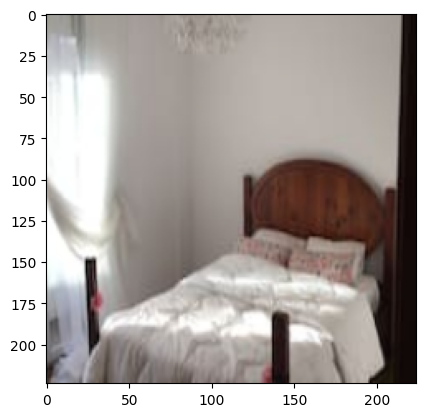

In [76]:
images_raw, idxs = download_images(data['Thumbnail Url'] , max_imgs=200)
plt.imshow(images_raw[1])

In [77]:
images = images_raw.astype("float32") / 255.
images.shape

(110, 224, 224, 3)

In [78]:
final_data = df_madrid.iloc[idxs]

In [79]:
final_data.shape

(110, 17)

In [80]:
final_data.head()

,level_0,index,Property Type,Room Type,Cancellation Policy,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Amenities,Minimum Nights,Maximum Nights,Number of Reviews,Host Total Listings Count,Price
1,1,1.0,0.0,0.0,2.0,7.0,2.0,2.0,5.0,1.0,5.0,15.0,2.0,1125.0,5.0,164.0,70.0
2,2,2.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,0.0,17.0,2.0,1125.0,5.0,2.0,110.0
4,4,4.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,10.0,1.0,1125.0,0.0,1.0,60.0
5,5,5.0,0.0,1.0,0.0,2.0,1.5,1.0,1.0,1.0,0.0,7.0,1.0,1125.0,0.0,1.0,70.0
6,6,6.0,0.0,0.0,2.0,6.0,1.0,2.0,3.0,2.0,12.0,17.0,2.0,1125.0,6.0,1.0,70.0


In [81]:
# seleccionamos la que será nuestra etiqueta
data=final_data
y_reg = data['Price']
y_reg.shape

(110,)

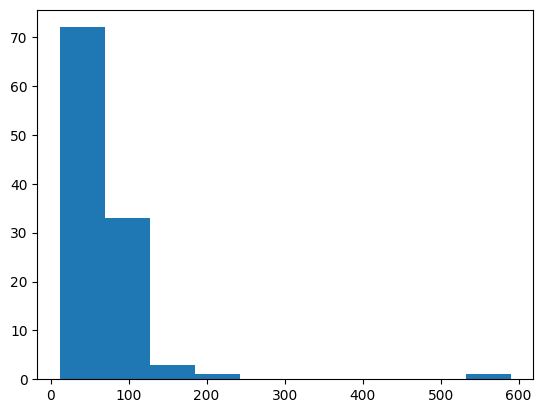

In [82]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

#### 1 Split de los datos

Para adaptarnos en un entorno más realista, dividiremos los datos en train test y validación. Después de la división haremos el análisis exploratorio en el train y los cambios que hagamos en él se lo haremos también a validación y test.

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y_reg, test_size=0.33, random_state=69)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=69)

#Nos queda: 33% para test, 60% aproximadamente de train y 7% aproximadamente de validación

In [84]:
X_test

,level_0,index,Property Type,Room Type,Cancellation Policy,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Amenities,Minimum Nights,Maximum Nights,Number of Reviews,Host Total Listings Count,Price
10,10,11.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,1.0,1125.0,0.0,1.0,25.0
18,18,19.0,0.0,0.0,0.0,6.0,2.0,4.0,4.0,1.0,0.0,15.0,1.0,1125.0,26.0,1.0,100.0
126,126,143.0,0.0,0.0,2.0,6.0,1.5,2.0,3.0,3.0,15.0,17.0,2.0,1125.0,24.0,23.0,70.0
27,27,32.0,0.0,0.0,2.0,5.0,1.0,1.0,2.0,2.0,15.0,19.0,2.0,1125.0,25.0,2.0,53.0
124,124,141.0,0.0,0.0,1.0,4.0,1.0,0.0,2.0,2.0,10.0,6.0,4.0,30.0,3.0,7.0,65.0
151,151,169.0,0.0,0.0,2.0,4.0,1.0,1.0,1.0,2.0,17.0,19.0,3.0,1125.0,1.0,142.0,103.0
101,101,116.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,10.0,8.0,1.0,1125.0,17.0,2.0,16.0
61,61,69.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,15.0,23.0,7.0,1125.0,5.0,3.0,50.0
14,14,15.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,18.0,1.0,1125.0,20.0,2.0,27.0
169,169,188.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,18.0,3.0,1125.0,72.0,2.0,60.0


In [85]:
import numpy as np
print(np.isnan(X_train))
print(np.isnan(np.sum(X_train)))
print(np.isnan(np.min(y_test)))

     level_0  index  Property Type  Room Type  Cancellation Policy  \
148    False  False          False      False                False   
159    False  False          False      False                False   
6      False  False          False      False                False   
136    False  False          False      False                False   
9      False  False          False      False                False   
..       ...    ...            ...        ...                  ...   
1      False  False          False      False                False   
166    False  False          False      False                False   
83     False  False          False      False                False   
103    False  False          False      False                False   
5      False  False          False      False                False   

     Accommodates  Bathrooms  Bedrooms   Beds  Guests Included  Extra People  \
148         False      False     False  False            False         False   

In [86]:
X_train.shape[1]

17

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Suponiendo que X_train, X_test, y_train, y_test, X_validation, y_validation están definidos

# Configuramos el decaimiento exponencial del learning rate
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Inicializamos el modelo
modelMLP = Sequential()
modelMLP.add(Dense(8, input_dim=X_train.shape[1], activation="relu"))
modelMLP.add(Dense(4, activation="relu"))
modelMLP.add(Dense(1, activation="linear"))  # Capa de salida para predicción

# Configuramos el optimizador con el horario de decaimiento del learning rate
opt = Adam(learning_rate=lr_schedule)

# Compilamos el modelo
modelMLP.compile(loss="mean_squared_error", optimizer=opt)

# Entrenamos el modelo
print("[INFO] training model...")
historia = modelMLP.fit(X_train, y_train,
                        validation_data=(X_validation, y_validation),
                        epochs=100, batch_size=200, verbose=2)

# Evaluamos el modelo
loss = modelMLP.evaluate(X_test, y_test)
print("[INFO] scores...")
print(f'Loss={loss}')

# Predicciones
print("[INFO] predicting house prices...")
preds = modelMLP.predict(X_test)
diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)

# Imprimimos el error en porcentaje
print("[INFO] Imprimo error en porcentaje...")
print(absPercentDiff)


[INFO] training model...
Epoch 1/100
1/1 - 3s - loss: 8673.2803 - val_loss: 14410.4941 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 8378.6533 - val_loss: 14117.1689 - 28ms/epoch - 28ms/step
Epoch 3/100
1/1 - 0s - loss: 8090.6665 - val_loss: 13823.9336 - 29ms/epoch - 29ms/step
Epoch 4/100
1/1 - 0s - loss: 7811.1821 - val_loss: 13530.4883 - 26ms/epoch - 26ms/step
Epoch 5/100
1/1 - 0s - loss: 7538.1318 - val_loss: 13246.7207 - 31ms/epoch - 31ms/step
Epoch 6/100
1/1 - 0s - loss: 7277.2959 - val_loss: 12976.9902 - 58ms/epoch - 58ms/step
Epoch 7/100
1/1 - 0s - loss: 7030.1968 - val_loss: 12713.8096 - 40ms/epoch - 40ms/step
Epoch 8/100
1/1 - 0s - loss: 6792.4282 - val_loss: 12457.3115 - 62ms/epoch - 62ms/step
Epoch 9/100
1/1 - 0s - loss: 6564.5459 - val_loss: 12204.2109 - 61ms/epoch - 61ms/step
Epoch 10/100
1/1 - 0s - loss: 6344.3579 - val_loss: 11950.7754 - 46ms/epoch - 46ms/step
Epoch 11/100
1/1 - 0s - loss: 6128.8286 - val_loss: 11703.7871 - 53ms/epoch - 53ms/step
Epoch 12/100
1/1 - 0

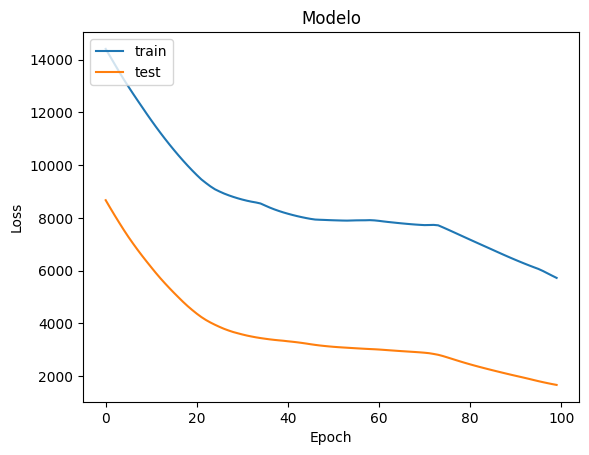

In [89]:
import matplotlib.pyplot as plt

plt.plot(historia.history['val_loss'])
plt.plot(historia.history['loss'])
# plt.plot(model.history['val_loss'])
plt.title('Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### IMÁGENES
Regresión con CNN

In [90]:
y_reg.shape

(110,)

In [91]:
images.max()

1.0

In [92]:
images.shape

(110, 224, 224, 3)

In [93]:
input_shape = (32, 32, 3)
images_reshaped = []
for img in images:
  images_reshaped.append(np.resize(img, input_shape))
images_reshaped = np.array(images_reshaped)
print(images_reshaped.shape)

(110, 32, 32, 3)


In [94]:
# División entre train, test y validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_reshaped, y_reg, test_size=0.3, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=69)
y_train.shape

(69,)

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm

# Inicializamos el modelo
modelCNN = Sequential()

# Definimos una capa convolucional
modelCNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Definimos una segunda capa convolucional
modelCNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Definimos una tercera capa convolucional
modelCNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN.add(Dropout(0.25))

# Añadimos nuestra "salida"
modelCNN.add(Flatten())
modelCNN.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
modelCNN.add(Dropout(0.5))
modelCNN.add(Dense(1, activation='linear'))  # Para regresión

# Compilamos el modelo sin el argumento 'decay'
opt = Adam(learning_rate=0.0001)
modelCNN.compile(loss='mean_squared_error', optimizer=opt)

# Entrenamos el modelo
historia = modelCNN.fit(X_train, y_train, batch_size=100, shuffle=True, epochs=50, validation_data=(X_val, y_val))

# Evaluamos el modelo
loss = modelCNN.evaluate(X_test, y_test)

print("[INFO] scores...")
print(f'Loss={loss}')


Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 4771.1191 - val_loss: 5025.7998
Epoch 2/50
1/1 [==============================] - 0s 62ms/step - loss: 4741.2793 - val_loss: 5014.9707
Epoch 3/50
1/1 [==============================] - 0s 55ms/step - loss: 4711.2461 - val_loss: 5004.5786
Epoch 4/50
1/1 [==============================] - 0s 68ms/step - loss: 4693.6221 - val_loss: 4994.5825
Epoch 5/50
1/1 [==============================] - 0s 43ms/step - loss: 4659.9160 - val_loss: 4984.0581
Epoch 6/50
1/1 [==============================] - 0s 38ms/step - loss: 4641.5771 - val_loss: 4972.0034
Epoch 7/50
1/1 [==============================] - 0s 40ms/step - loss: 4619.2534 - val_loss: 4958.1416
Epoch 8/50
1/1 [==============================] - 0s 38ms/step - loss: 4581.0752 - val_loss: 4942.4434
Epoch 9/50
1/1 [==============================] - 0s 39ms/step - loss: 4541.9795 - val_loss: 4924.2241
Epoch 10/50
1/1 [==============================] - 0s 37ms/step - loss: 450

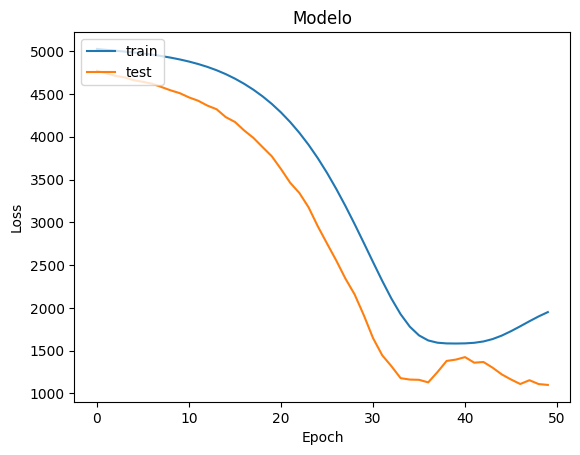

In [97]:
import matplotlib.pyplot as plt

plt.plot(historia.history['val_loss'])
plt.plot(historia.history['loss'])
plt.title('Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Concatenamos nuestros MLP y CNN